In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/DavronbekSattorov/ThinkDSP/blob/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.24915444, 0.56129215, 0.40702762, 0.00711468, 0.16613757],
       [0.74949835,        nan,        nan,        nan,        nan],
       [0.04582581,        nan,        nan,        nan,        nan],
       [0.59118907,        nan,        nan,        nan,        nan],
       [0.56206022,        nan,        nan,        nan,        nan],
       [0.34006661,        nan,        nan,        nan,        nan]])

In [4]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([1, 2, 1, 2, 1, 3, 2, 3, 2, 3, 2, 0, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 4, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 0, 4, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3,
       1, 3, 1, 3, 2, 1, 1, 0, 3, 2, 1, 2])

In [5]:
rows = np.random.randint(nrows, size=n)
rows

array([63, 14, 11, 99, 71, 39, 59, 29, 85, 52, 78, 88, 89, 56, 31, 24, 28,
       42, 16, 60,  8, 39, 55, 37, 48, 30, 23,  4, 88, 25, 43, 40, 99, 70,
       68, 18, 95, 87, 21, 19, 58, 25, 52, 57, 17, 38, 90, 13, 56, 55, 95,
       50, 68, 40, 32, 90, 60, 82,  2, 23,  6, 90, 69, 57,  6, 36, 75, 53,
       53, 50, 38, 64, 23, 76, 31, 49, 56, 11, 32, 18,  6, 19, 21, 49, 55,
       79, 36, 13, 74, 67,  6, 97, 92, 10, 85, 62, 77, 65, 21, 91])

In [6]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.24915444, 0.56129215, 0.40702762, 0.00711468, 0.16613757],
       [0.74949835,        nan,        nan,        nan,        nan],
       [0.04582581, 0.11383711,        nan,        nan,        nan],
       [0.59118907,        nan,        nan,        nan,        nan],
       [0.56206022, 0.42971788,        nan,        nan,        nan],
       [0.34006661,        nan,        nan,        nan,        nan]])

In [8]:
import pandas as pd

df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.249154,0.561292,0.407028,0.007115,0.166138
1,0.749498,NaN,NaN,NaN,NaN
2,0.045826,0.113837,NaN,NaN,NaN
3,0.591189,NaN,NaN,NaN,NaN
4,0.562060,0.429718,NaN,NaN,NaN


In [9]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.249154,0.561292,0.407028,0.007115,0.166138
1,0.749498,0.561292,0.407028,0.007115,0.166138
2,0.045826,0.113837,0.407028,0.007115,0.166138
3,0.591189,0.113837,0.407028,0.007115,0.166138
4,0.562060,0.429718,0.407028,0.007115,0.166138


In [10]:
total = filled.sum(axis=1)
total.head()

0    1.390726
1    1.891070
2    0.739943
3    1.285306
4    1.572058
dtype: float64

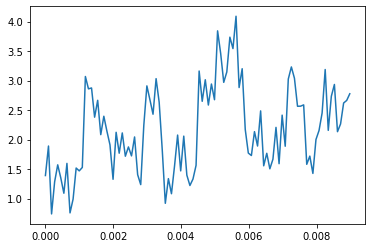

In [12]:
from thinkdsp import Wave

wave = Wave(total.values)
wave.plot()

In [13]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [14]:
ys = voss(11025)
ys


array([6.93690795, 6.61911999, 6.50387219, ..., 9.00384912, 8.68359171,
       8.37511933])

In [15]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

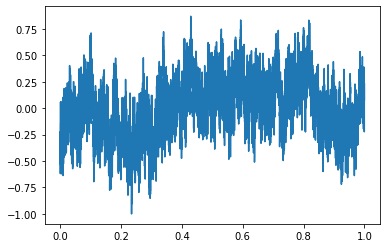

In [16]:
wave.plot()

In [17]:
wave.make_audio()

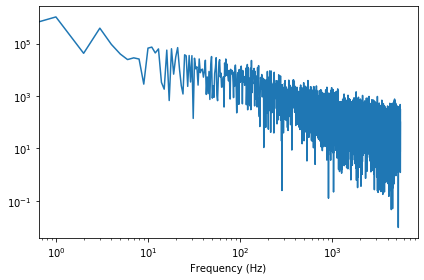

In [19]:
loglog = dict(xscale='log', yscale='log')

spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

In [20]:
spectrum.estimate_slope().slope

-1.0071137966084964

In [21]:
seg_length = 64 * 1024
iters = 100
wave = Wave(voss(seg_length * iters))
len(wave)

6553600

In [23]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

32769

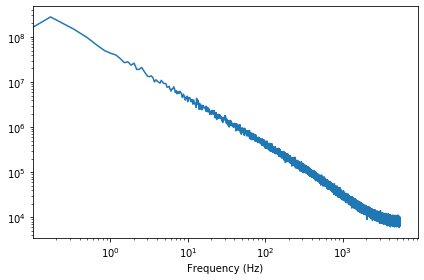

In [24]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

In [25]:
spectrum.estimate_slope().slope

-1.0018896035260445